## Export Figure for Finishing in Adobe Illustrator

Finishing touches can be faster and more elegant when done with a graphics package. 

Matplotlib can export to both SVG and PDF vector formats that are compatible with editing in a graphics package. Because I use Adobe Illustrator, my preferred approach is to use a PDF. The approach will be similar for other commercial and open source graphics packages. 

If you want to edit individual parts of a plot, then clipping masks will need to be released after the PDF has been opened in Illustrator:

> select all content (ctrl + A) and then release clipping mask using the dropdown menu (Object -> Clipping Mask -> Release) or keyboard shortcut (alt + ctrl + 7)

This may need to be done more than once to release various clipping masks. If your axis limits are set smaller than your data, then releasing the clipping mask will make the data outside the plot area appear. 

When working with vector graphics generated by matplotlib, compound paths may also need to be released:

> select target content or all content (ctrl + A) and then release compound path using the dropdown menu (Object -> Compound Path -> Release) or keyboard shortcut (alt + shift + ctrl + 8)

This is not typically required for PDF documents opened with Illustrator. SVG can need compound paths released. 

In [1]:
import matplotlib.pyplot as plt

# Change underlying settings to make editing in a graphics package easier 

# Output text as editable text objects (True Type) instead of shapes (i.e., the default Output Type 3)
plt.rcParams['pdf.fonttype'] = 42

# Output text as editable text objects instead of shapes (i.e., the default output type of 'path')
# Making this change assumes that the required font is installed
plt.rcParams['svg.fonttype'] = 'none'

# Force PDF to respect zorder by suppressing image compositing
plt.rcParams['image.composite_image'] = False

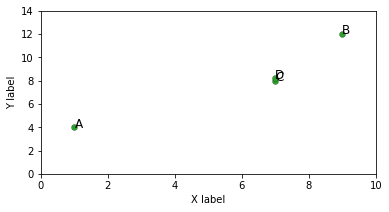

In [2]:
# Test data
x = [1, 9, 7, 7]
y = [4, 12, 8, 8.2]
labels = ['A', 'B', 'C', 'D']

fig, ax = plt.subplots(1,1,figsize=(6,3))

# Plot data as a scatter plot
ax.scatter(
    x,
    y,
    c='tab:green',
    edgecolors = 'k',
    linewidths = 0.2,
)

# Add data labels
for label, x_loc, y_loc in zip(labels, x, y):
    plt.annotate(
        label,
        (x_loc, y_loc),
        fontsize=12,
    )

# A different approach to adding labels
'''
for i, label in enumerate(labels):
    plt.annotate(
        label, 
        (x[i], y[i]), 
        fontsize=12,
        )
'''

# Format plot
ax.set_xlim(0,10)
ax.set_ylim(0,14)
ax.set_ylabel('Y label')
ax.set_xlabel('X label')

# Export figure as a PDF
plt.savefig(
    'test.pdf', 
    bbox_inches='tight',
    pad_inches=0.1,
    transparent=True,
    )

# The kwarg "bbox_inches" prevents parts of the figures appearing outside the page.

# When using "bbox_inches", it's useful to also use "pad_inches=0.1"
# to create a little space between the plot and page edge.

# The kwarg "transparent=True" removes the fill inside the plot area.